<a href="https://colab.research.google.com/github/patidemitroff/PyPati/blob/main/descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [4]:
df_dados_paises = pd.read_csv('/content/Atividade cap 11 dados_1997_2011_paises_csv.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [5]:
df_dados_paises.head(10)

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao
0,África do Sul,1997,0.6328,56,44.54,52.60298,148814151.0,43353.632
1,África do Sul,1998,0.6272,57,31.11,54.51911,134295557.0,43961.924
2,África do Sul,1999,0.6216,50,43.90,61.04379,133183581.0,44526.272
3,África do Sul,2000,0.6160,52,51.52,62.47182,132877648.0,45064.098
4,África do Sul,2001,0.6126,50,45.12,62.04144,118478979.0,45576.215
5,África do Sul,2002,0.6092,50,40.97,62.15008,111100828.0,46076.953
6,África do Sul,2003,0.6058,48,47.67,61.81803,168219302.0,46566.626
7,África do Sul,2004,0.6024,48,53.79,63.23793,219092937.0,47032.866
8,África do Sul,2005,0.5990,44,51.95,64.01835,247064310.0,47483.447
9,África do Sul,2006,0.6010,46,52.01,64.97832,261007039.0,47925.669


In [6]:
df_dados_paises.groupby('pais')                .agg(n = pd.NamedAgg('pais', 'count'))                .reset_index()

,pais,n
0,Alemanha,15
1,Austrália,15
2,Brasil,15
3,Bélgica,15
4,Canadá,15
5,China,15
6,Cingapura,15
7,Coréia,15
8,Espanha,15
9,Estados Unidos,15


In [7]:
df_dados_paises.dtypes

pais                       object
ano                         int64
idh                       float64
corrupcao_indice            int64
competitividade_indice    float64
globalizacao_indice       float64
pib                       float64
populacao                 float64
dtype: object

In [8]:
#moda
df_dados_paises.groupby('pais')['idh']                .apply(lambda x: x.mode().iloc[0])                .to_frame()                .reset_index()

,pais,idh
0,Alemanha,0.8466
1,Austrália,0.8958
2,Brasil,0.6464
3,Bélgica,0.8628
4,Canadá,0.9030
5,China,0.5598
6,Cingapura,0.7404
7,Coréia,0.8078
8,Espanha,0.8162
9,Estados Unidos,0.8886


In [9]:
#media
df_dados_paises.groupby('pais')['idh']                .apply(lambda x: x.mean())                .to_frame()                .reset_index()

,pais,idh
0,Alemanha,0.882880
1,Austrália,0.914507
2,Brasil,0.684653
3,Bélgica,0.876107
4,Canadá,0.890480
5,China,0.625240
6,Cingapura,0.821587
7,Coréia,0.856907
8,Espanha,0.852427
9,Estados Unidos,0.900947


In [10]:
#minimo
df_dados_paises.groupby('pais')['idh']                .apply(lambda x: x.min())                .to_frame()                .reset_index()

,pais,idh
0,Alemanha,0.8466
1,Austrália,0.8958
2,Brasil,0.6464
3,Bélgica,0.8628
4,Canadá,0.8736
5,China,0.5598
6,Cingapura,0.7404
7,Coréia,0.8078
8,Espanha,0.8162
9,Estados Unidos,0.8886


In [11]:
#media
df_dados_paises.groupby('pais')['idh']                .apply(lambda x: x.max())                .to_frame()                .reset_index()

,pais,idh
0,Alemanha,0.9050
1,Austrália,0.9290
2,Brasil,0.7180
3,Bélgica,0.8860
4,Canadá,0.9080
5,China,0.6870
6,Cingapura,0.8660
7,Coréia,0.8970
8,Espanha,0.8780
9,Estados Unidos,0.9130


# Quartil e percentil

In [12]:
#quartil - percentil 25, 50 e 75 da amostra // mediana: 50 da amostra
df_dados_paises.groupby('pais')['idh']                .apply(lambda x: x.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))                .to_frame()                .reset_index()                .rename(columns={'level_1': 'percentil'})

,pais,percentil,idh
0,Alemanha,0.05,0.85066
1,Alemanha,0.25,0.86710
2,Alemanha,0.50,0.88880
3,Alemanha,0.75,0.90050
4,Alemanha,0.95,0.90360
...,...,...,...
90,Índia,0.05,0.44996
91,Índia,0.25,0.46530
92,Índia,0.50,0.49540
93,Índia,0.75,0.52500


# Desvio médio

In [ ]:
#desvio medio
df_dados_paises.groupby('pais')                .agg(desvio_medio_abs_idh = pd.NamedAgg('idh', 'mad'))                .reset_index()

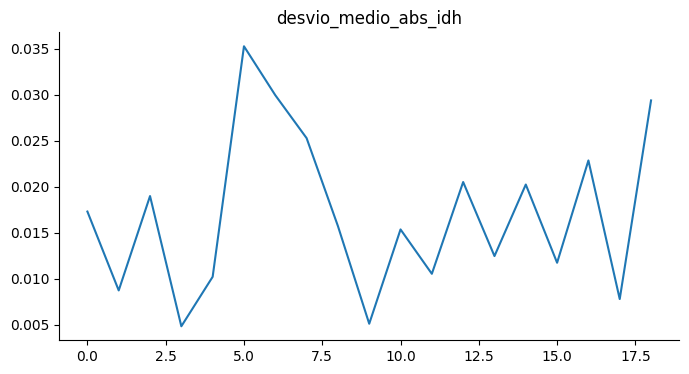

In [16]:
from matplotlib import pyplot as plt
_df_1['desvio_medio_abs_idh'].plot(kind='line', figsize=(8, 4), title='desvio_medio_abs_idh')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
df_dados_paises.groupby('pais')                .agg(variancia_idh = pd.NamedAgg('idh', 'var'),
                    dp_idh = pd.NamedAgg('idh', 'std'))                .reset_index()

,pais,variancia_idh,dp_idh
0,Alemanha,0.000408,0.020187
1,Austrália,0.000110,0.010485
2,Brasil,0.000517,0.022727
3,Bélgica,0.000041,0.006401
4,Canadá,0.000142,0.011899
5,China,0.001758,0.041928
6,Cingapura,0.001443,0.037984
7,Coréia,0.000886,0.029773
8,Espanha,0.000372,0.019299
9,Estados Unidos,0.000043,0.006558


from matplotlib import pyplot as plt
_df_2['variancia_idh'].plot(kind='hist', bins=20, title='variancia_idh')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['dp_idh'].plot(kind='hist', bins=20, title='dp_idh')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='variancia_idh', y='dp_idh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['variancia_idh'].plot(kind='line', figsize=(8, 4), title='variancia_idh')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['dp_idh'].plot(kind='line', figsize=(8, 4), title='dp_idh')
plt.gca().spines[['top', 'right']].set_visible(False)